In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
print(tf.__version__)

2.12.0


In [2]:
training_data = np.load('TF_dataset.npz')

In [3]:
print('Srednia dla pierwszej kolumny inputs', np.mean(training_data['inputs'][:,0])) #obliczanie średniej kolumny inputs
print('-'*50)
print('Srednia dla drugiej kolumny inputs', np.mean(training_data['inputs'][:,1])) #obliczanie średniej kolumny inputs
print('-'*50)
print('Mediana dla pierwszej kolumny inputs', np.median(training_data['inputs'][:,0])) #obliczanie mediany kolumny inputs
print('-'*50)
print('Mediana kolumny dla drugiej inputs', np.median(training_data['inputs'][:,1])) #obliczanie mediany kolumny inputs
print('-'*50)
print('Odchylenie dla pierwszej standardowe kolumny inputs', np.std(training_data['inputs'][:,0])) #obliczanie odchylenia standardowego kolumny inputs
print('-'*50)
print('Odchylenie dla drugiej standardowe kolumny inputs', np.std(training_data['inputs'][:,1])) #obliczanie odchylenia standardowego kolumny inputs
print('-'*50)
print('Wariancja dla pierwzej kolumny inputs', np.var(training_data['inputs'][:,0])) #obliczanie wariancji kolumny inputs
print('-'*50)
print('Wariancja dla drugiej kolumny inputs', np.var(training_data['inputs'][:,1])) #obliczanie wariancji kolumny inputs

Srednia dla pierwszej kolumny inputs -0.12004392975780508
--------------------------------------------------
Srednia dla drugiej kolumny inputs -0.3793567109873589
--------------------------------------------------
Mediana dla pierwszej kolumny inputs -0.13542128652828467
--------------------------------------------------
Mediana kolumny dla drugiej inputs -0.6834716870140172
--------------------------------------------------
Odchylenie dla pierwszej standardowe kolumny inputs 5.888271949659089
--------------------------------------------------
Odchylenie dla drugiej standardowe kolumny inputs 5.963299186147557
--------------------------------------------------
Wariancja dla pierwzej kolumny inputs 34.67174655314204
--------------------------------------------------
Wariancja dla drugiej kolumny inputs 35.560937183508116


Ilość wierszy w pierwszej kolumnie inputs 1000
Ilość wierszy w drugiej kolumnie inputs 1000


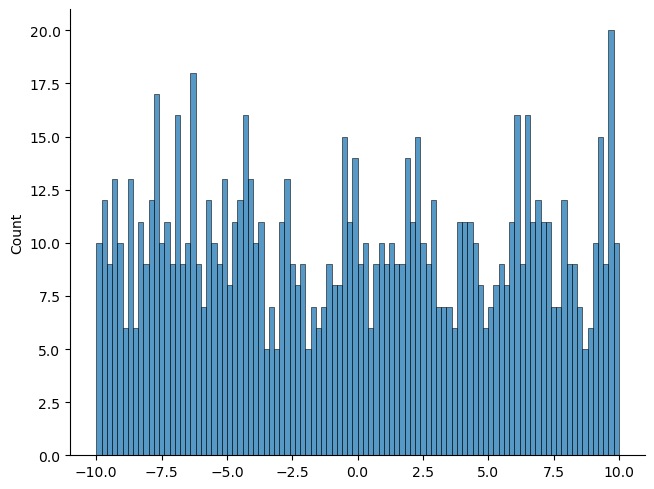

In [4]:

print('Ilość wierszy w pierwszej kolumnie inputs', len(training_data['inputs'][:,0]))
print('Ilość wierszy w drugiej kolumnie inputs', len(training_data['inputs'][:,1]))
sns.displot(training_data['inputs'][:,0],bins=100, aspect= 1.33) #wykres rozkładu dla kolumny inputs

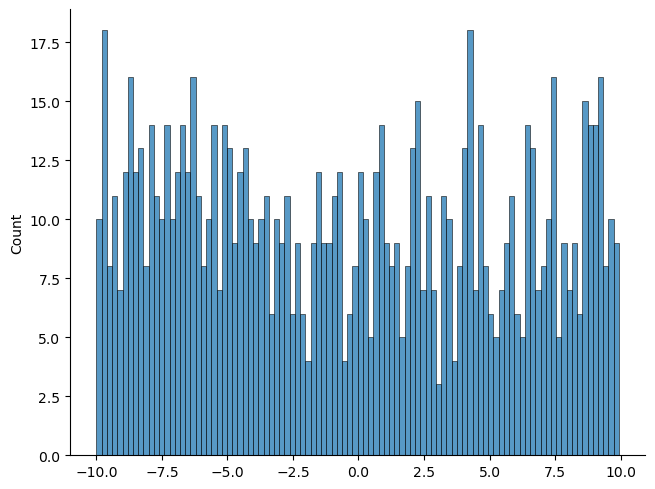

In [5]:
sns.displot(training_data['inputs'][:,1],bins=100, aspect= 1.33) #wykres rozkładu dla kolumny inputs

In [6]:
df = pd.DataFrame(training_data['inputs'], columns=['x1', 'x2'])
df.describe(include='all')


,x1,x2
count,1000.000000,1000.000000
mean,-0.120044,-0.379357
std,5.891218,5.966283
min,-9.989706,-9.998791
25%,-5.363735,-5.722500
50%,-0.135421,-0.683472
75%,5.150972,4.712050
max,9.990427,9.934534


In [7]:
df.var()

x1    34.706453
x2    35.596534
dtype: float64

In [8]:
#Wnioski:
#Wartości odchylenia standardowego są bardzo zbliżone, powodem jest to, że dane są bardzo podobne

In [9]:
#print(training_data.files) #załadowanie danych z pliku TF_dataset.npz
print(training_data['targets']) #wyświetlenie danych z kolumny targets z pliku TF_dataset.npz
print(training_data['inputs']) #wyświetlenie danych z kolumny inputs z pliku TF_dataset.npz

[[-14.4426417 ]
 [  3.14407167]
 [  6.7672401 ]
 [ 46.06916234]
 [ 12.98068285]
 [  7.93317956]
 [ 20.759698  ]
 [-36.48773131]
 [-17.37434245]
 [-12.36047265]
 [  6.96514377]
 [ 33.4324112 ]
 [  2.29449372]
 [  6.65090183]
 [ 37.4260518 ]
 [-25.32423357]
 [ 30.25973628]
 [ 21.40530733]
 [ 30.17684597]
 [ 17.72899158]
 [ 34.17555794]
 [  6.16244028]
 [ 46.05615102]
 [  3.7779935 ]
 [  9.63469043]
 [  9.08311664]
 [ -5.39500331]
 [ -4.00674599]
 [ -7.28139363]
 [-22.47988206]
 [  8.05080912]
 [ -0.14140647]
 [  5.95207994]
 [  0.25639391]
 [ 15.12703856]
 [ 18.49381784]
 [  3.48131712]
 [ 29.63161411]
 [ -5.1164053 ]
 [ 13.92715104]
 [ 22.28943077]
 [ 15.22203354]
 [-29.8668341 ]
 [ 26.97754078]
 [  2.91462218]
 [ 36.48448366]
 [ 16.48871093]
 [  8.97233464]
 [-21.51942538]
 [-27.03466156]
 [ 11.63618121]
 [ 11.5357334 ]
 [ 37.23424544]
 [ 13.10485845]
 [ 26.13446142]
 [-26.90178044]
 [ -3.32698837]
 [ 12.48613354]
 [ 38.96259087]
 [ 26.8408294 ]
 [ 48.21786448]
 [ -3.55281575]
 [-23.28

In [10]:
input_size = 2 #przypisanie wartości 2 do zmiennej input_size  
output_size = 1 #przypisanie wartości 1 do zmiennej output_size

model

In [11]:
model = tf.keras.Sequential([ #Stworzenie modelu za pomocą Sequential, przy użyciu liniowego stosowania warstw
    tf.keras.layers.Dense(output_size) #Łączenie warstw, przy użyciu Dense, z jedną warstwą wyjściową   
])
model.compile(optimizer='sgd', loss='mean_squared_error') #Kompilacja modelu, przy użyciu optymalizatora sgd i funkcji straty mean_squared_error
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1) #Trenowanie modelu, przy użyciu danych z pliku TF_dataset.npz, 100 epok, wyświetlanie postępu, verbose=1 oznacza, że wyświetla się postęp w postaci liczby epok

Epoch 1/100
32/32 [==============================] - 0s 909us/step - loss: 39.9358
Epoch 2/100
32/32 [==============================] - 0s 803us/step - loss: 4.5947
Epoch 3/100
32/32 [==============================] - 0s 861us/step - loss: 1.5277
Epoch 4/100
32/32 [==============================] - 0s 785us/step - loss: 0.6450
Epoch 5/100
32/32 [==============================] - 0s 813us/step - loss: 0.4233
Epoch 6/100
32/32 [==============================] - 0s 877us/step - loss: 0.3574
Epoch 7/100
32/32 [==============================] - 0s 803us/step - loss: 0.3474
Epoch 8/100
32/32 [==============================] - 0s 825us/step - loss: 0.3361
Epoch 9/100
32/32 [==============================] - 0s 964us/step - loss: 0.3347
Epoch 10/100
32/32 [==============================] - 0s 929us/step - loss: 0.3383
Epoch 11/100
32/32 [==============================] - 0s 894us/step - loss: 0.3328
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 13/100
3

wagi

In [12]:
model.layers[0].get_weights() #Wyświetlenie wagi pierwszej warstwy modelu 

[array([[ 2.0136135],
        [-3.0112803]], dtype=float32),
 array([5.018536], dtype=float32)]

In [13]:
model.layers[0].get_weights()[0] #Wyświetlenie wagi pierwszej warstwy modelu w kolumnie 0 

array([[ 2.0136135],
       [-3.0112803]], dtype=float32)

In [14]:
model.layers[0].get_weights()[1] #Wyświetlenie wagi pierwszej warstwy modelu w kolumnie 1

array([5.018536], dtype=float32)

In [15]:
model.predict_on_batch(training_data['inputs']).round(1) #Wyświetlenie przewidywanych wartości modelu, przy użyciu danych z pliku TF_dataset.npz, zaookrąglone do 1 miejsca po przecinku 

array([[-15.4],
       [  4. ],
       [  6.2],
       [ 46.6],
       [ 12.1],
       [  7. ],
       [ 20.5],
       [-35.9],
       [-16.6],
       [-13.3],
       [  7.1],
       [ 32.7],
       [  2.1],
       [  7.5],
       [ 37.2],
       [-24.7],
       [ 31. ],
       [ 21.5],
       [ 29.5],
       [ 17.1],
       [ 34.6],
       [  5.2],
       [ 46.3],
       [  3.8],
       [ 10.1],
       [  8.5],
       [ -5.2],
       [ -3.7],
       [ -7.8],
       [-22. ],
       [  8.9],
       [  0.5],
       [  5.8],
       [  0.3],
       [ 15.8],
       [ 18.8],
       [  3. ],
       [ 30.7],
       [ -4.6],
       [ 13.3],
       [ 22.9],
       [ 14.4],
       [-30.3],
       [ 27.6],
       [  2.9],
       [ 37. ],
       [ 16. ],
       [  8.9],
       [-20.8],
       [-26.8],
       [ 12.5],
       [ 11.6],
       [ 37.1],
       [ 14.1],
       [ 26.5],
       [-26.1],
       [ -3.4],
       [ 12.1],
       [ 38.3],
       [ 26.7],
       [ 48.1],
       [ -3.9],
       [

In [16]:
training_data['targets'].round(1)

array([[-14.4],
       [  3.1],
       [  6.8],
       [ 46.1],
       [ 13. ],
       [  7.9],
       [ 20.8],
       [-36.5],
       [-17.4],
       [-12.4],
       [  7. ],
       [ 33.4],
       [  2.3],
       [  6.7],
       [ 37.4],
       [-25.3],
       [ 30.3],
       [ 21.4],
       [ 30.2],
       [ 17.7],
       [ 34.2],
       [  6.2],
       [ 46.1],
       [  3.8],
       [  9.6],
       [  9.1],
       [ -5.4],
       [ -4. ],
       [ -7.3],
       [-22.5],
       [  8.1],
       [ -0.1],
       [  6. ],
       [  0.3],
       [ 15.1],
       [ 18.5],
       [  3.5],
       [ 29.6],
       [ -5.1],
       [ 13.9],
       [ 22.3],
       [ 15.2],
       [-29.9],
       [ 27. ],
       [  2.9],
       [ 36.5],
       [ 16.5],
       [  9. ],
       [-21.5],
       [-27. ],
       [ 11.6],
       [ 11.5],
       [ 37.2],
       [ 13.1],
       [ 26.1],
       [-26.9],
       [ -3.3],
       [ 12.5],
       [ 39. ],
       [ 26.8],
       [ 48.2],
       [ -3.6],
       [

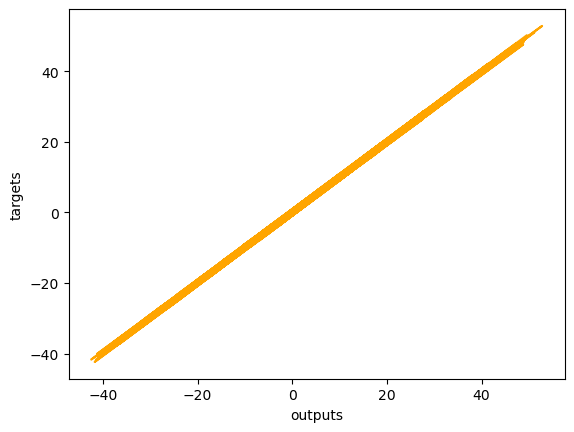

In [17]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']), color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()